In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd # 분석용 파이썬 라이브러리 패키지
import numpy as np # 계산용 파이썬 라이브러리 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt # 시각화 파이썬 라이브러리 패키지
import seaborn as sns # 시각화 파이썬 라이브러리 패키지 as는 seaborn을 sns로 쓰겠다는 말

data = pd.read_csv("/content/drive/MyDrive/sit_0908.csv", encoding="euc-kr")
data

,FILE_Name,Neck,Knee,OuPut
0,sit_bad_5_85.jpg,28.566,-169.796,BAD1
1,sit_bad_5_82.jpg,23.728,-168.802,BAD1
2,sit_bad_5_83.jpg,23.499,-170.009,BAD1
3,20220817_190913_025.jpg,77.407,0.000,BAD1
4,20220817_190913_006.jpg,81.254,0.000,BAD1
...,...,...,...,...
1736,IMG_9713.jpg,83.326,10.804,GOOD
1737,IMG_9716.jpg,83.254,11.143,GOOD
1738,IMG_9717.jpg,82.648,10.804,GOOD
1739,IMG_9715.jpg,83.290,10.664,GOOD


In [3]:
# kmeans_data = data[["Neck", "Hip"]] # 필요한 행만 가져옴
kmeans_data = data[["Neck", "Knee"]] # 필요한 행만 가져옴

In [4]:
# 데이터 표준화 # 군집화 하려면 필수

from sklearn.preprocessing import StandardScaler
# Standardization 평균 0 / 분산 1

scaler = StandardScaler()   
scaler = scaler.fit_transform(kmeans_data)

scaler = pd.DataFrame(scaler)
# scaler = scaler.rename(columns = {0:'Neck', 1:'Hip'}) 
scaler = scaler.rename(columns = {0:'Neck', 1:'Knee'}) 
scaler

,Neck,Knee
0,-1.037847,-2.690025
1,-1.199817,-2.679494
2,-1.207484,-2.692281
3,0.597289,-0.891243
4,0.726082,-0.891243
...,...,...
1736,0.795450,-0.776788
1737,0.793039,-0.773197
1738,0.772751,-0.776788
1739,0.794244,-0.778271


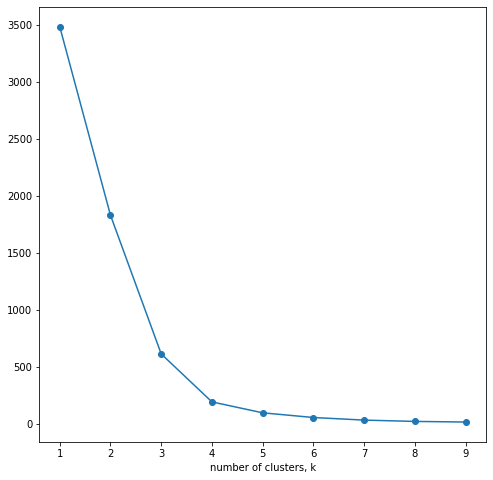

In [5]:
# Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데
# 이 지점의 K 값을 군집의 개수로 사용

from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaler)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(8, 8))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('')
plt.xticks(ks)
plt.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6c1be8ed0>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

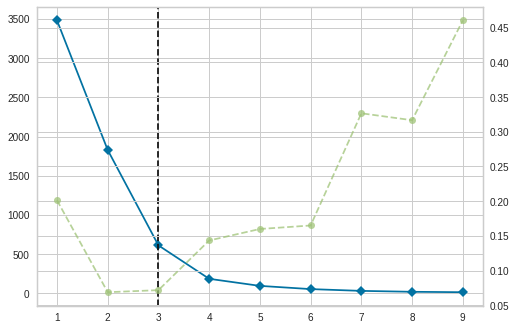

In [6]:
# 자동으로 k를 찾는 k-means

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaler)

In [7]:
# 스케일된 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0) # k값은 아까 구한 값 아니면 분류 값 # ★★꼭바꿔주기★★
clusters = kmeans.fit(scaler)

#클러스터링 변수인 clusters 값을 원본 데이터 내에 넣기 
scaler['cluster'] = clusters.labels_
scaler

,Neck,Knee,cluster
0,-1.037847,-2.690025,0
1,-1.199817,-2.679494,0
2,-1.207484,-2.692281,0
3,0.597289,-0.891243,0
4,0.726082,-0.891243,0
...,...,...,...
1736,0.795450,-0.776788,0
1737,0.793039,-0.773197,0
1738,0.772751,-0.776788,0
1739,0.794244,-0.778271,0


In [8]:
scaler.groupby('cluster').count() # cluster로 묶인것만 카운트

,Neck,Knee
cluster,,
0,821,821
1,337,337
2,583,583


In [9]:
# 그룹별 평균값

scaler.groupby('cluster').mean()

,Neck,Knee
cluster,,
0,0.314172,-0.975590
1,-1.805822,0.834094
2,0.601419,0.891715


In [10]:
output = data[["FILE_Name", "OuPut"]]
scaler = pd.concat([scaler, output], axis=1)

In [11]:
scaler

,Neck,Knee,cluster,FILE_Name,OuPut
0,-1.037847,-2.690025,0,sit_bad_5_85.jpg,BAD1
1,-1.199817,-2.679494,0,sit_bad_5_82.jpg,BAD1
2,-1.207484,-2.692281,0,sit_bad_5_83.jpg,BAD1
3,0.597289,-0.891243,0,20220817_190913_025.jpg,BAD1
4,0.726082,-0.891243,0,20220817_190913_006.jpg,BAD1
...,...,...,...,...,...
1736,0.795450,-0.776788,0,IMG_9713.jpg,GOOD
1737,0.793039,-0.773197,0,IMG_9716.jpg,GOOD
1738,0.772751,-0.776788,0,IMG_9717.jpg,GOOD
1739,0.794244,-0.778271,0,IMG_9715.jpg,GOOD


In [12]:
# scaler.to_csv('/content/drive/MyDrive/stand_0908_kmeans.csv', index=False, encoding="euc-kr") 
scaler.to_csv('/content/drive/MyDrive/sit_0908_kmeans.csv', index=False, encoding="euc-kr") 

# 여기부턴 생략해도 됩니다
어떻게 묶였는지 보기 위해서 차원축소해본거라 kmeans랑 관계없습니다!

In [98]:
# 클러스터가 날아가서 임시로 만들어줌

cluster = scaler[["cluster"]]
cluster

,cluster
0,3
1,2
2,2
3,3
4,2
...,...
2346,4
2347,4
2348,4
2349,4


In [99]:
scaler = scaler[["Neck", "Hip"]]
# scaler = scaler[["Neck", "Knee"]]

In [100]:
# 값이 2개인데 차원축소를 안시키면 표시가안됨
# 생략해도 괜찮은데 그림으로 보기 위해 넣어봄

from sklearn.decomposition import PCA 
X = scaler.copy() # 표준화 변수를 copy한 새로운 변수 'X'를 만들어 PCA를 적용

#객체
pca = PCA(n_components=2) # 2개로 축소

#적용
pca.fit(X)
X_pca = pca.transform(X)
X_pca

array([[-0.82118614, -0.15029577],
       [ 1.71621293, -2.75718092],
       [ 1.97637115, -3.01733914],
       ...,
       [-2.30911589,  1.64173069],
       [-2.31950547,  1.64679192],
       [ 1.23664137, -2.25520852]])

In [101]:
# 보기 편하게 데이터프레임으로 표시

pca_scaler = pd.DataFrame(X_pca)
pca_scaler

,0,1
0,-0.821186,-0.150296
1,1.716213,-2.757181
2,1.976371,-3.017339
3,-0.764239,-0.212571
4,1.965855,-3.002800
...,...,...
2346,-2.338231,1.693628
2347,-2.211915,1.561874
2348,-2.309116,1.641731
2349,-2.319505,1.646792


In [102]:
# 날아갔던 클러스터를 다시 합쳐줌

pca_scaler = pd.concat([pca_scaler, cluster], axis=1)
pca_scaler

,0,1,cluster
0,-0.821186,-0.150296,3
1,1.716213,-2.757181,2
2,1.976371,-3.017339,2
3,-0.764239,-0.212571,3
4,1.965855,-3.002800,2
...,...,...,...
2346,-2.338231,1.693628,4
2347,-2.211915,1.561874,4
2348,-2.309116,1.641731,4
2349,-2.319505,1.646792,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


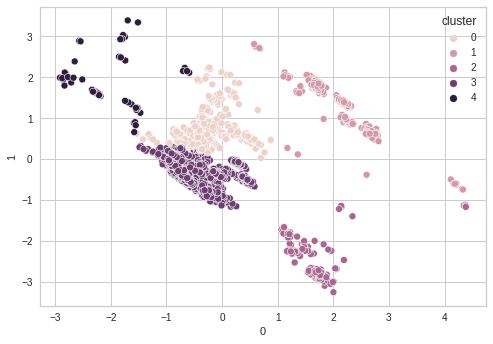

In [103]:
axs = plt.subplots()
axs_KK = sns.scatterplot(0, 1, hue='cluster', data=pca_scaler)